In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"
import matplotlib as mpl
import h5py
import multiprocessing
from tqdm import tqdm



# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"
from tqdm import tqdm
import gc
import os

Snapshot_Init = 71
Snapshot_End = 99
h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3

Host_Index_At_99 = 329508
Host_Index_At_98 = 329045
Satellite_Index_At_98 = 329051



In [2]:
hdf5_File_Path = './Radius90'
hdf5_files = [f for f in os.listdir(hdf5_File_Path) if f.endswith('.hdf5')]
with h5py.File(os.path.join(hdf5_File_Path, hdf5_files[0]), 'r') as file:
    # 获取文件中的 keys
    hdf5_keys = list(file.keys())

In [3]:
hdf5_keys

['HI_Radius50',
 'HI_Radius90',
 'Stars_Radius50',
 'Stars_Radius90',
 'Subhalo_Index',
 'Subhalo_MassType']

In [4]:
for key in hdf5_keys:
    globals()[key] = []

In [8]:
for hdf5_filepath in tqdm(hdf5_files):
    with h5py.File(os.path.join(hdf5_File_Path, hdf5_filepath), 'r') as file:
        if 'HI_Radius50' not in file.keys():
            continue
        for key in hdf5_keys:

            globals()[key].append(file[key][()])

100%|██████████| 3292/3292 [00:56<00:00, 58.25it/s]


In [9]:
for key in hdf5_keys:
    globals()[key] = np.array(globals()[key])


In [10]:
restrict_indices=np.where((Subhalo_MassType[:,0]>1)&(Subhalo_MassType[:,4]>1))[0]

In [14]:
restrict_indices.shape

(850,)

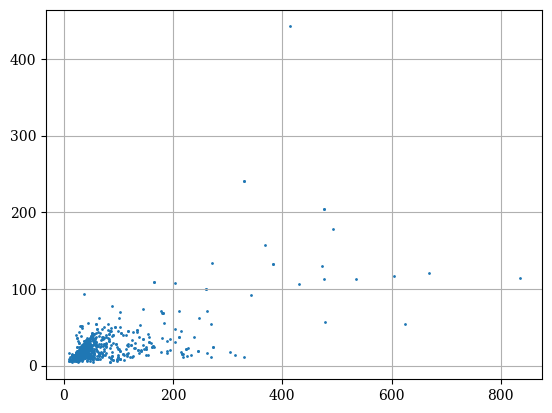

In [11]:
plt.scatter(HI_Radius90[restrict_indices],Stars_Radius90[restrict_indices],s=1)
plt.grid()

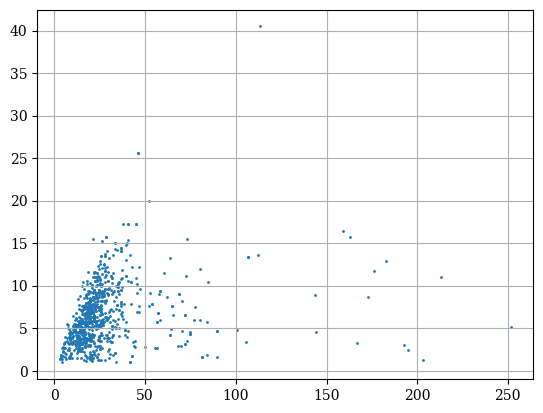

In [12]:
plt.scatter(HI_Radius50[restrict_indices],Stars_Radius50[restrict_indices],s=1)
plt.grid()

In [ ]:
plt.scatter(HI_Radius90[restrict_indices],Stars_Radius90[restrict_indices],s=1)
plt.grid()

In [27]:

sort_indices=np.argsort(HI_Radius90[restrict_indices])
Stars_R90_sorted=Stars_Radius90[restrict_indices][sort_indices][::-1]
HI_R90_sorted=HI_Radius90[restrict_indices][sort_indices][::-1]
Subhalo_ID_sorted=Subhalo_Index[restrict_indices][sort_indices][::-1]



In [28]:
for i in range(100):
    print(Subhalo_ID_sorted[i],Stars_R90_sorted[i],HI_R90_sorted[i])

319730 114.73555358058897 834.6564047842268
117250 120.2280641140309 667.8572772202876
418335 53.95698046012116 624.2069784602593
242788 117.44133926902245 604.891971014863
167392 112.6756029857527 535.2900428547173
264883 178.17033830359242 493.2043332878513
229933 125.0410765335881 488.39485871224394
345872 57.23709201147411 477.57971942817977
307485 112.84448936648408 476.70720375041384
184931 204.47746524147746 475.63681807420943
282779 129.99125097568643 472.1678165621333
289385 106.96367520068334 430.3726347363611
143880 442.4091919072534 413.54733769016053
208811 132.25771639672521 382.4728974275661
253861 156.87283791043956 368.0862560992746
300903 92.47132744458987 342.6946426909554
220595 241.32656156114365 330.44447090529576
495451 10.897235585381578 329.23051599694355
516101 13.320195625750404 314.1205809476406
406941 17.53013981263339 304.0105084714974
511920 24.559262984058577 273.99361861766874
324123 133.55014057597072 271.6223243257
313692 53.61950377637875 268.7831037

In [9]:
with h5py.File('./stellar_circs.hdf5', 'r') as f:
    circ=f['Snapshot_99']['CircAbove07Frac'][()]
    indices=f['Snapshot_99']['SubfindID'][()]

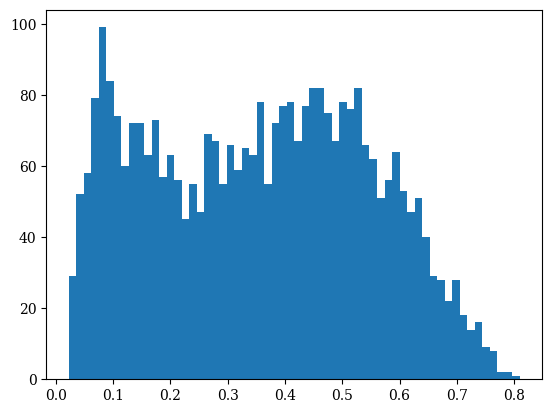

In [10]:
hist=plt.hist(circ[np.in1d(indices,Subhalo_Index)],bins=60)

In [33]:
circ[np.where(indices==475619)]

array([0.3996553], dtype=float32)

In [44]:
hist[1][np.where(hist[0]==45)]

array([0.21953961])

In [ ]:
circ_frac_limit=0.22

In [ ]:
Disk_SubIndices=np.where(circ>circ_frac_limit)[0]
Bulge_SubIndices=np.where(circ<=circ_frac_limit)[0]
Disk_Subhalos_Indices=indices[Disk_SubIndices]
Bulge_Subhalos_Indices=indices[Bulge_SubIndices]

change the R==0 assignment to -1 rather than 0

In [ ]:
Disk_Fraction=HI/Stars


find the growth of the disk and comparation between the stars and the HI
